In [2]:
import numpy as np
import pandas as pd
import statistics

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('historic.csv', sep=';')

In [5]:
df.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.000000
1,-2,0,STARFRUIT,5002,1,4997.0,31.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5002.5,0.000000
2,-2,100,AMETHYSTS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,2.000000
3,-2,100,STARFRUIT,4997,24,NaN,NaN,NaN,NaN,5003,2,5004.0,22.0,NaN,NaN,5000.0,1.925293
4,-2,200,STARFRUIT,4997,2,4996.0,20.0,NaN,NaN,5003,20,NaN,NaN,NaN,NaN,5000.0,2.134766


In [6]:
df.tail()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
3995,-2,199700,AMETHYSTS,9998,8,9996.0,2.0,9995.0,25.0,10004,2,10005.0,25.0,NaN,NaN,10001.0,-48.000000
3996,-2,199800,STARFRUIT,4949,21,NaN,NaN,NaN,NaN,4956,21,NaN,NaN,NaN,NaN,4952.5,904.429688
3997,-2,199800,AMETHYSTS,9995,21,NaN,NaN,NaN,NaN,10002,8,10005.0,21.0,NaN,NaN,9998.5,-48.000000
3998,-2,199900,STARFRUIT,4950,32,NaN,NaN,NaN,NaN,4954,7,4956.0,32.0,NaN,NaN,4952.0,900.953125
3999,-2,199900,AMETHYSTS,9996,2,9995.0,30.0,NaN,NaN,10004,2,10005.0,30.0,NaN,NaN,10000.0,-48.000000


In [25]:
amethyst = df[df['product']=='AMETHYSTS']
starfruit = df[df['product']=='STARFRUIT']

In [26]:
amethyst.head(2)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,-2,0,AMETHYSTS,10002,1,9996.0,2.0,9995.0,29.0,10004,2,10005.0,29.0,NaN,NaN,10003.0,0.0
2,-2,100,AMETHYSTS,9996,2,9995.0,22.0,NaN,NaN,10004,2,10005.0,22.0,NaN,NaN,10000.0,2.0


In [27]:
amethyst.describe()

,day,timestamp,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
count,2000.0,2000.000000,2000.000000,2000.000000,1464.000000,1464.000000,351.000000,351.000000,2000.000000,2000.000000,1455.000000,1455.000000,302.000000,302.000000,2000.000000,2000.000000
mean,-2.0,99950.000000,9996.627000,8.436500,9995.301230,19.594945,9995.094017,22.897436,10003.480500,8.548500,10004.744330,20.197251,10004.947020,24.119205,10000.053750,-47.783000
std,0.0,57749.458872,1.978593,10.266288,0.637278,10.342356,0.320256,7.325944,1.890081,10.409026,0.597387,9.811230,0.224366,6.179945,1.481328,2.624186
min,-2.0,0.000000,9995.000000,1.000000,9995.000000,1.000000,9995.000000,1.000000,9998.000000,1.000000,10000.000000,1.000000,10004.000000,1.000000,9996.500000,-48.000000
25%,-2.0,49975.000000,9995.000000,1.000000,9995.000000,20.000000,9995.000000,22.000000,10004.000000,1.000000,10005.000000,20.000000,10005.000000,22.000000,10000.000000,-48.000000
50%,-2.0,99950.000000,9996.000000,2.000000,9995.000000,24.000000,9995.000000,24.000000,10004.000000,2.000000,10005.000000,24.000000,10005.000000,25.000000,10000.000000,-48.000000
75%,-2.0,149925.000000,9998.000000,20.000000,9995.000000,27.000000,9995.000000,28.000000,10005.000000,20.000000,10005.000000,27.000000,10005.000000,28.000000,10000.000000,-48.000000
max,-2.0,199900.000000,10002.000000,30.000000,10000.000000,30.000000,9998.000000,30.000000,10005.000000,30.000000,10005.000000,30.000000,10005.000000,30.000000,10003.500000,2.000000


In [28]:
starfruit.head(2)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,-2,0,STARFRUIT,5002,1,4997.0,31.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5002.5,0.000000
3,-2,100,STARFRUIT,4997,24,NaN,NaN,NaN,NaN,5003,2,5004.0,22.0,NaN,NaN,5000.0,1.925293


In [29]:
starfruit.head(2)

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,-2,0,STARFRUIT,5002,1,4997.0,31.0,NaN,NaN,5003,31,NaN,NaN,NaN,NaN,5002.5,0.000000
3,-2,100,STARFRUIT,4997,24,NaN,NaN,NaN,NaN,5003,2,5004.0,22.0,NaN,NaN,5000.0,1.925293


In [30]:
starfruit.describe()

,day,timestamp,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
count,2000.0,2000.000000,2000.000000,2000.00000,754.000000,754.000000,59.000000,59.000000,2000.000000,2000.000000,692.000000,692.000000,104.000000,104.000000,2000.000000,2000.000000
mean,-2.0,99950.000000,4977.611000,17.23700,4976.948276,23.969496,4975.847458,24.661017,4982.993500,18.025000,4983.789017,22.109827,4984.634615,23.903846,4980.302250,354.865086
std,0.0,57749.458872,14.282706,11.43933,14.117463,6.771189,14.744740,3.457177,14.322605,11.285037,14.451135,8.898662,13.852242,6.016997,14.271093,284.195901
min,-2.0,0.000000,4948.000000,1.00000,4948.000000,1.000000,4950.000000,20.000000,4949.000000,1.000000,4955.000000,1.000000,4956.000000,1.000000,4948.500000,-84.460938
25%,-2.0,49975.000000,4964.000000,4.00000,4963.000000,22.000000,4961.000000,22.000000,4969.000000,4.000000,4970.000000,21.000000,4971.000000,21.750000,4966.000000,149.869141
50%,-2.0,99950.000000,4982.000000,23.00000,4982.000000,25.000000,4982.000000,25.000000,4988.000000,23.000000,4989.000000,25.000000,4990.000000,24.500000,4985.500000,248.347656
75%,-2.0,149925.000000,4989.000000,27.00000,4987.000000,28.000000,4986.500000,27.000000,4993.000000,27.000000,4995.000000,28.000000,4993.000000,27.250000,4991.000000,636.525391
max,-2.0,199900.000000,5003.000000,32.00000,4999.000000,32.000000,4997.000000,32.000000,5006.000000,32.000000,5006.000000,32.000000,5005.000000,32.000000,5004.000000,938.695312


In [39]:
starfruit["mid_price"].describe()

count    2000.000000
mean     4980.302250
std        14.271093
min      4948.500000
25%      4966.000000
50%      4985.500000
75%      4991.000000
max      5004.000000
Name: mid_price, dtype: float64

In [40]:
mid_prices1 = starfruit["mid_price"]

In [41]:
timestamps1 = starfruit['timestamp']

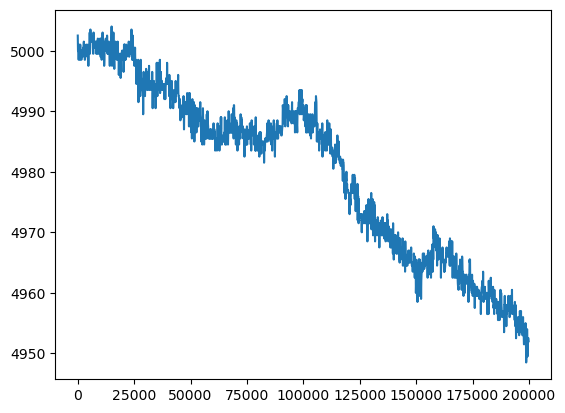

In [42]:
plt.plot(timestamps1, mid_prices1, linestyle='-')

In [43]:
mid_prices2 = amethyst["mid_price"]

In [44]:
timestamps2 = amethyst['timestamp']

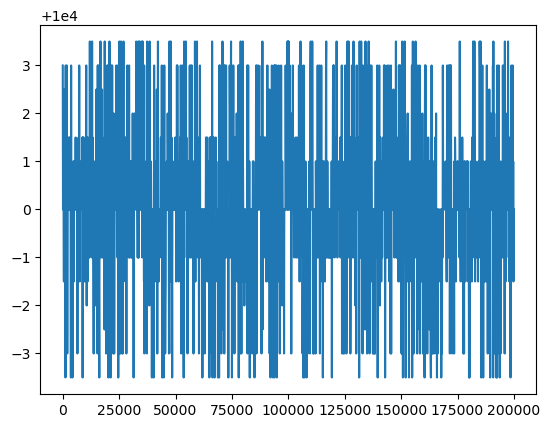

In [45]:
plt.plot(timestamps2, mid_prices2, linestyle='-')

In [47]:
np.mean(mid_prices1)

4980.30225

In [48]:
from matplotlib import pyplot

In [54]:
series = starfruit[['timestamp','mid_price']]

In [55]:
series = starfruit.set_index('timestamp')['mid_price']

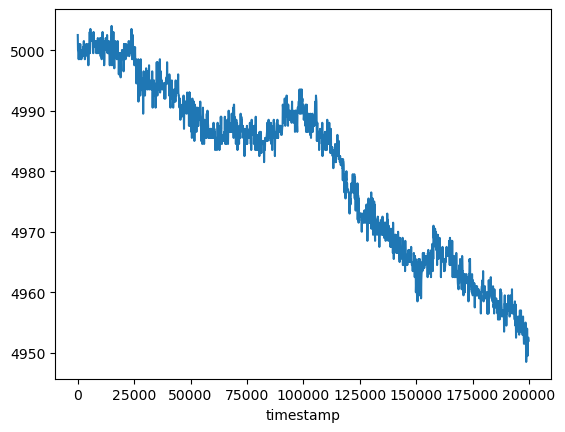

In [56]:
series.plot()
pyplot.show()

In [59]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot

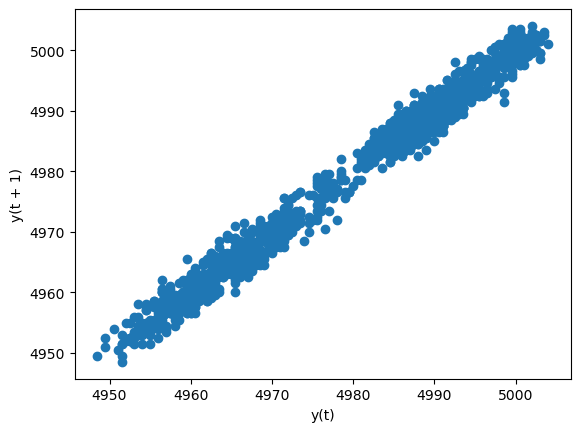

In [60]:
lag_plot(series)
pyplot.show()

In [68]:
import pandas as pd
values = pd.DataFrame(series.values)
dataframe = pd.concat([values.shift(4),values.shift(3),values.shift(2),values.shift(1), values], axis=1)
dataframe.columns = ['t-4','t-3','t-2','t-1', 't+1']
result = dataframe.corr()
print(result)

          t-4       t-3       t-2       t-1       t+1
t-4  1.000000  0.993127  0.992528  0.992640  0.992153
t-3  0.993127  1.000000  0.993140  0.992542  0.992654
t-2  0.992528  0.993140  1.000000  0.993153  0.992556
t-1  0.992640  0.992542  0.993153  1.000000  0.993166
t+1  0.992153  0.992654  0.992556  0.993166  1.000000


In [65]:
import pandas as pd
for lag in range(1,5):
    values = pd.DataFrame(series.values)
    dataframe = pd.concat([values.shift(-lag), values], axis=1)
    dataframe.columns = [f't-{lag}', 't']
    result = dataframe.corr()
    print(result)

          t-1         t
t-1  1.000000  0.993166
t    0.993166  1.000000
          t-2         t
t-2  1.000000  0.992556
t    0.992556  1.000000
          t-3         t
t-3  1.000000  0.992654
t    0.992654  1.000000
          t-4         t
t-4  1.000000  0.992153
t    0.992153  1.000000


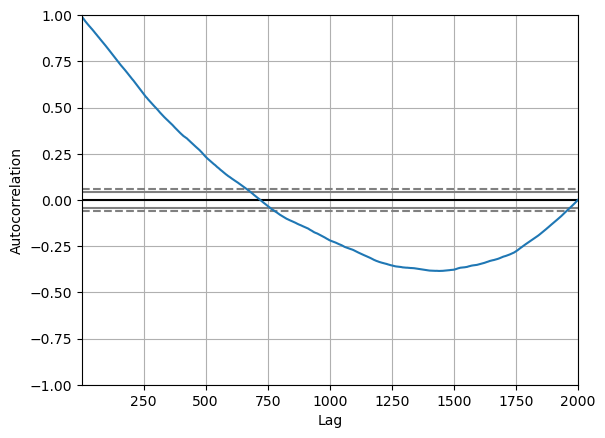

In [70]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()

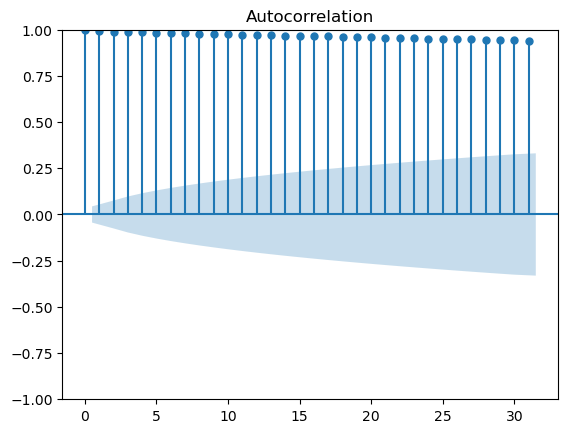

In [71]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(series, lags=31)
pyplot.show()

Coefficients: [2.85793298 0.3213974  0.22728502 0.23948268 0.21125028]
predicted=4962.771723, expected=4961.500000
predicted=4962.799937, expected=4965.000000
predicted=4962.649947, expected=4963.000000
predicted=4962.110056, expected=4961.500000
predicted=4962.494730, expected=4959.500000
predicted=4962.465694, expected=4962.000000
predicted=4962.382813, expected=4958.500000
predicted=4962.327646, expected=4961.500000
predicted=4962.365387, expected=4963.000000
predicted=4962.338996, expected=4963.000000
predicted=4962.308372, expected=4962.500000
predicted=4962.289915, expected=4965.500000
predicted=4962.278676, expected=4962.000000
predicted=4962.257959, expected=4965.500000
predicted=4962.237857, expected=4962.500000
predicted=4962.220097, expected=4959.500000
predicted=4962.202484, expected=4965.500000
predicted=4962.183597, expected=4963.000000
predicted=4962.165023, expected=4963.000000
predicted=4962.146791, expected=4962.500000
predicted=4962.128466, expected=4963.500000
predi

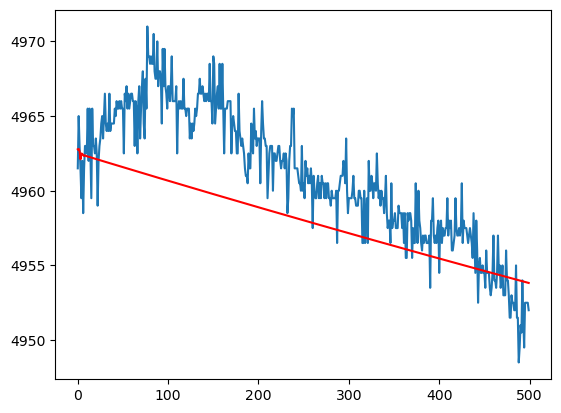

In [81]:
# create and evaluate a static autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
# split dataset
X = series.values
#2000 - 15000 - 500
train, test = X[1:len(X)-500], X[len(X)-500:]
# train autoregression
model = AutoReg(train, lags=4)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Coefficients: [11.21557682  0.38914211  0.28684663  0.32175247]
predicted=4962.554891, expected=4961.500000
predicted=4962.775832, expected=4965.000000
predicted=4961.825033, expected=4963.000000
predicted=4962.340455, expected=4961.500000
predicted=4962.339383, expected=4959.500000
predicted=4962.180890, expected=4962.000000
predicted=4962.284745, expected=4958.500000
predicted=4962.279351, expected=4961.500000
predicted=4962.256048, expected=4963.000000
predicted=4962.278847, expected=4963.000000
predicted=4962.279300, expected=4962.500000
predicted=4962.278518, expected=4965.500000
predicted=4962.285679, expected=4962.000000
predicted=4962.288387, expected=4965.500000
predicted=4962.291243, expected=4962.500000
predicted=4962.295436, expected=4959.500000
predicted=4962.298758, expected=4965.500000
predicted=4962.302172, expected=4963.000000
predicted=4962.305803, expected=4963.000000
predicted=4962.309264, expected=4962.500000
predicted=4962.312751, expected=4963.500000
predicted=49

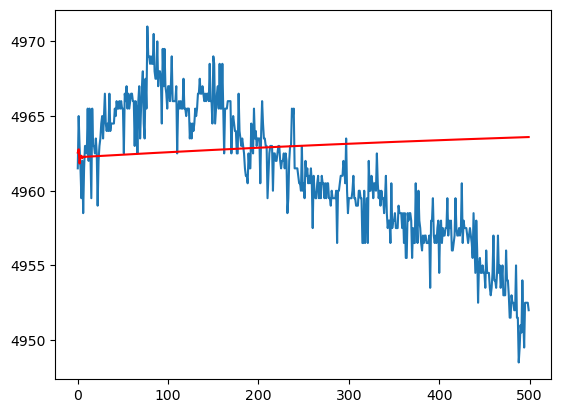

In [78]:
# create and evaluate a static autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
# split dataset
X = series.values
#2000 - 15000 - 500
train, test = X[1:len(X)-500], X[len(X)-500:]
# train autoregression
model = AutoReg(train, lags=3)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Coefficients: [-2.13561028  0.2885106   0.19081325  0.20491717  0.16141166  0.15476233]
predicted=4963.161324, expected=4961.500000
predicted=4963.065283, expected=4965.000000
predicted=4962.762519, expected=4963.000000
predicted=4962.803793, expected=4961.500000
predicted=4962.397331, expected=4959.500000
predicted=4962.699649, expected=4962.000000
predicted=4962.654037, expected=4958.500000
predicted=4962.575078, expected=4961.500000
predicted=4962.546325, expected=4963.000000
predicted=4962.499508, expected=4963.000000
predicted=4962.503760, expected=4962.500000
predicted=4962.470357, expected=4965.500000
predicted=4962.435077, expected=4962.000000
predicted=4962.407390, expected=4965.500000
predicted=4962.379265, expected=4962.500000
predicted=4962.353905, expected=4959.500000
predicted=4962.324684, expected=4965.500000
predicted=4962.295722, expected=4963.000000
predicted=4962.267769, expected=4963.000000
predicted=4962.239744, expected=4962.500000
predicted=4962.211749, expected=

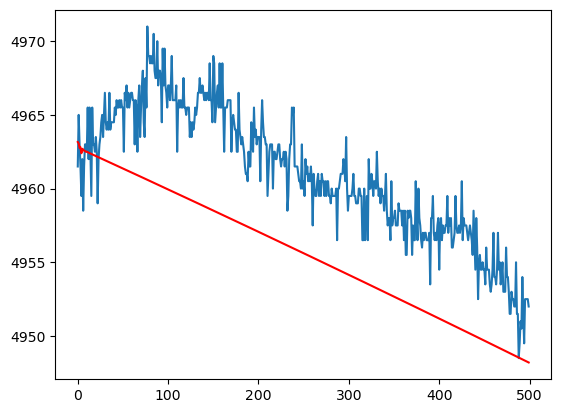

In [79]:
# create and evaluate a static autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
# split dataset
X = series.values
#2000 - 15000 - 500
train, test = X[1:len(X)-500], X[len(X)-500:]
# train autoregression
model = AutoReg(train, lags=5)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('predicted=%f, expected=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [82]:
intercept = model_fit.params[0]
print('Intercept:', intercept)

Intercept: 2.8579329784261063
